In [20]:
import pyLDAvis
import utility_functions as utils
import importlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import itertools
from collections import Counter
import os
from contextualized_topic_models.models.ctm import CombinedTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessingStopwords
import nltk
from nltk.corpus import stopwords as stop_words

importlib.reload(utils)
path_to_east_coast_lyrics = '/Users/borosabel/Documents/Uni/Thesis/PopMIR/Data/Lyrics/east_coast'
path_to_west_coast_lyrics = '/Users/borosabel/Documents/Uni/Thesis/PopMIR/Data/Lyrics/west_coast'

concreteness_df = pd.read_excel('./concreteness_scores.xlsx')
concreteness_ratings = concreteness_df.set_index('Word')['Conc.M'].to_dict()

importlib.reload(utils)

<module 'utility_functions' from '/Users/borosabel/Documents/Uni/Thesis/PopMIR/Code/Lyrics/utility_functions.py'>

In [2]:
# Load data into dataframes
east_coast_df = utils.load_txt_into_dataframe(path_to_east_coast_lyrics)
west_coast_df = utils.load_txt_into_dataframe(path_to_west_coast_lyrics)

In [3]:
# Clean up lyrics column
east_coast_df['Lyrics'] = east_coast_df['Lyrics'].apply(utils.cleanup)
west_coast_df['Lyrics'] = west_coast_df['Lyrics'].apply(utils.cleanup)

In [4]:
# Assuming 'df' is your DataFrame and 'text_column' is the name of the column containing text
east_coast_df.to_csv('east_coast_lyrics_line_by_line.txt', columns=['Lyrics'], index=False, header=False, encoding='utf-8')
west_coast_df.to_csv('west_coast_lyrics_line_by_line.txt', columns=['Lyrics'], index=False, header=False, encoding='utf-8')

In [5]:
text_file_east = 'east_coast_lyrics_line_by_line.txt'
text_file_west = 'west_coast_lyrics_line_by_line.txt'

documents_east = [line.strip() for line in open(text_file_east, encoding="utf-8").readlines()[0:2000]]
documents_west = [line.strip() for line in open(text_file_west, encoding="utf-8").readlines()[0:2000]]

In [6]:
stopwords = list(stop_words.words("english"))

sp_east = WhiteSpacePreprocessingStopwords(documents_east, stopwords_list=stopwords)
sp_west = WhiteSpacePreprocessingStopwords(documents_west, stopwords_list=stopwords)

preprocessed_documents_east, unpreprocessed_corpus_east, vocab_east, retained_indices_east = sp_east.preprocess()
preprocessed_documents_west, unpreprocessed_corpus_west, vocab_west, retained_indices_west = sp_west.preprocess()

In [7]:
tp_east = TopicModelDataPreparation("all-mpnet-base-v2")
tp_west = TopicModelDataPreparation("all-mpnet-base-v2")

training_dataset_east = tp_east.fit(text_for_contextual=unpreprocessed_corpus_east, text_for_bow=preprocessed_documents_east)
training_dataset_west = tp_west.fit(text_for_contextual=unpreprocessed_corpus_west, text_for_bow=preprocessed_documents_west)

/Users/borosabel/lib/python3.9/site-packages/contextualized_topic_models/utils/data_preparation.py:64: UserWarning: the longest document in your collection has 1917 words, the model instead truncates to 128 tokens.
  warnings.warn(
/Users/borosabel/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/borosabel/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/borosabel/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creat

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/borosabel/lib/python3.9/site-packages/contextualized_topic_models/utils/data_preparation.py:64: UserWarning: the longest document in your collection has 1876 words, the model instead truncates to 128 tokens.
  warnings.warn(
/Users/borosabel/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/borosabel/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/borosabel/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creat

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
model_path_east = '/Users/borosabel/Documents/Uni/Thesis/PopMIR/Code/Lyrics/contextualized_topic_model_east/epoch_9.pth'
ctm_east = CombinedTM(bow_size=len(tp_east.vocab), contextual_size=768, n_components=5, num_epochs=10)

if os.path.exists(model_path_east):
    ctm_east.load("/Users/borosabel/Documents/Uni/Thesis/PopMIR/Code/Lyrics/contextualized_topic_model_east", epoch=9)
else:
    ctm_east.fit(training_dataset_east) # run the model

/Users/borosabel/lib/python3.9/site-packages/contextualized_topic_models/models/ctm.py:669: Warning: This is an experimental feature that we has not been fully tested. Refer to the following issue:https://github.com/MilaNLProc/contextualized-topic-models/issues/38
  warnings.warn(


In [10]:
tp_west

array(['across', 'act', 'actin', ..., 'yes', 'yet', 'zone'], dtype=object)

In [8]:
model_path = '/Users/borosabel/Documents/Uni/Thesis/PopMIR/Code/Lyrics/contextualized_topic_model_west/epoch_9.pth'
ctm_west = CombinedTM(bow_size=len(tp_west.vocab), contextual_size=768, n_components=5, num_epochs=10)

if os.path.exists(model_path):
    ctm_west.load("/Users/borosabel/Documents/Uni/Thesis/PopMIR/Code/Lyrics/contextualized_topic_model_west", epoch=9)
else:
    ctm_west.fit(training_dataset_west) # run the model

/Users/borosabel/lib/python3.9/site-packages/contextualized_topic_models/models/ctm.py:669: Warning: This is an experimental feature that we has not been fully tested. Refer to the following issue:https://github.com/MilaNLProc/contextualized-topic-models/issues/38
  warnings.warn(


In [14]:
training_dataset_east

In [21]:
lda_vis_data_east = ctm_east.get_ldavis_data_format(tp_east.vocab, training_dataset_east, n_samples=10)
ctm_pd_east = pyLDAvis.prepare(**lda_vis_data_east)

lda_vis_data_west = ctm_east.get_ldavis_data_format(tp_west.vocab, training_dataset_west, n_samples=10)
ctm_pd_west = pyLDAvis.prepare(**lda_vis_data_west)

  0%|          | 0/13 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true

In [22]:
ctm_pd_west

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.000568 -0.000314       1        1  25.484515
4     -0.000501 -0.000394       2        1  19.867892
2     -0.000049  0.000264       3        1  19.721823
3     -0.000022  0.000296       4        1  18.457562
0      0.000004  0.000147       5        1  16.468208, topic_info=         Term        Freq       Total Category  logprob  loglift
464   dollars  124.000000  124.000000  Default  30.0000  30.0000
1190     nuff  121.000000  121.000000  Default  29.0000  29.0000
200   brother  120.000000  120.000000  Default  28.0000  28.0000
443    diggin  126.000000  126.000000  Default  27.0000  27.0000
1845   trying  121.000000  121.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
433   diamond   22.217295  127.907489   Topic5  -7.5323   0.0533
1210     ones   22.132581  126.170778   Topic5  -7.5361   0

In [209]:
east_topic_df = ctm_pd_east[0]
west_topic_df = ctm_pd_west[0]

In [210]:
colors = ['#4EF9F3', '#3AF8F2', '#26F7F0', '#13F6EF', '#09ECE5', '#C5596E', '#BF4A61', '#B54057', '#A63A50', '#973549'] 

In [211]:
combined_df = pd.concat([east_topic_df, west_topic_df])

In [212]:
combined_df['Color'] = colors

<Axes: xlabel='x', ylabel='y'>

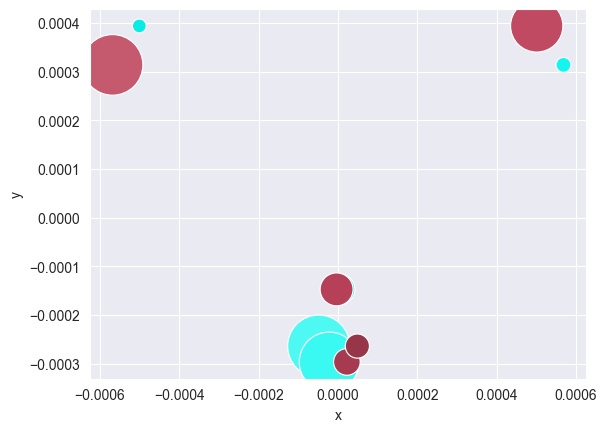

In [213]:
sns.scatterplot(combined_df, x='x', y='y', size='Freq', sizes=(100, 2000), color=combined_df['Color'], legend=False)

In [18]:
ctm_pd_west

NameError: name 'ctm_pd_west' is not defined

In [10]:
vis.display(ctm_pd_east)

In [11]:
vis.display(ctm_pd_west)

In [216]:
ctm_east = CombinedTM(bow_size=len(tp_east.vocab), contextual_size=768, n_components=2, num_epochs=10)
ctm_east.fit(training_dataset_east) # run the model

0it [00:00, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingfac

In [217]:
lda_vis_data_east = ctm_east.get_ldavis_data_format(tp_east.vocab, training_dataset_east, n_samples=5)
ctm_pd_east = vis.prepare(**lda_vis_data_east)

  0%|          | 0/11 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true

In [218]:
vis.display(ctm_pd_east)

In [225]:
word_count = 0
word = 'niggas'
for song in preprocessed_documents_east:
    word_count += song.count(word)
    
print(word_count)

1594


In [219]:
ctm_west = CombinedTM(bow_size=len(tp_west.vocab), contextual_size=768, n_components=2, num_epochs=1)
ctm_west.fit(training_dataset_west) # run the model

0it [00:00, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingfac

In [220]:
lda_vis_data_west = ctm_east.get_ldavis_data_format(tp_west.vocab, training_dataset_west, n_samples=5)
ctm_pd_west = vis.prepare(**lda_vis_data_west)

  0%|          | 0/11 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true

In [221]:
vis.display(ctm_pd_west)

In [6]:
combined_df = pd.concat([east_coast_df, west_coast_df], ignore_index=True)

In [7]:
# Clean up lyrics column
combined_df['Lyrics'] = combined_df['Lyrics'].apply(utils.cleanup)

In [8]:
combined_df.to_csv('combined_lyrics_line_by_line.txt', columns=['Lyrics'], index=False, header=False, encoding='utf-8')

In [9]:
text_file_combined = 'combined_lyrics_line_by_line.txt'

documents_combined = [line.strip() for line in open(text_file_combined, encoding="utf-8").readlines()[0:2000]]

stopwords = list(stop_words.words("english"))

sp_combined = WhiteSpacePreprocessingStopwords(documents_combined, stopwords_list=stopwords)

preprocessed_documents_combined, unpreprocessed_corpus_combined, vocab_combined, retained_indices_combined = sp_combined.preprocess()
tp_combined = TopicModelDataPreparation("all-mpnet-base-v2")

training_dataset_combined = tp_combined.fit(text_for_contextual=unpreprocessed_corpus_combined, text_for_bow=preprocessed_documents_combined)
model_path = '/Users/borosabel/Documents/Uni/Thesis/PopMIR/Code/Lyrics/contextualized_topic_model_combined/epoch_9.pth'
ctm_combined = CombinedTM(bow_size=len(tp_combined.vocab), contextual_size=768, n_components=5, num_epochs=10)

if os.path.exists(model_path):
    ctm_combined.load("/Users/borosabel/Documents/Uni/Thesis/PopMIR/Code/Lyrics/contextualized_topic_model_combined", epoch=9)
else:
    ctm_combined.fit(training_dataset_combined)
    
lda_vis_data_combined = ctm_combined.get_ldavis_data_format(tp_combined.vocab, training_dataset_combined, n_samples=5)
ctm_pd_combined = vis.prepare(**lda_vis_data_combined)
vis.display(ctm_pd_combined)

/Users/borosabel/lib/python3.9/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/borosabel/lib/python3.9/site-packages/contextualized_topic_models/utils/data_preparation.py:64: UserWarning: the longest document in your collection has 1916 words, the model instead truncates to 128 tokens.
  warnings.warn(
Batches: 100%|██████████| 10/10 [00:29<00:00,  2.99s/it]


/Users/borosabel/lib/python3.9/site-packages/contextualized_topic_models/models/ctm.py:669: Warning: This is an experimental feature that we has not been fully tested. Refer to the following issue:https://github.com/MilaNLProc/contextualized-topic-models/issues/38
  warnings.warn(


  0%|          | 0/29 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true

In [15]:
topics_predictions = ctm_combined.get_thetas(training_dataset_combined, n_samples=5)

  0%|          | 0/29 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true

In [16]:
topic_number = np.argmax(topics_predictions[1])

In [17]:
topic_number

4

In [18]:
east_coast_artists = list(set(east_coast_df['Artist']))
west_coast_artists = list(set(west_coast_df['Artist']))
east_contribution = {0: 0, 1: 0, 2:0, 3:0, 4:0}
west_contribution = {0: 0, 1: 0, 2:0, 3:0, 4:0}

number_of_east_coast_music = 0
number_of_west_coast_music = 0
for index, predictions in enumerate(topics_predictions):
    predicted_topic = np.argmax(predictions)
    song_artist = combined_df.at[index, 'Artist']
    if song_artist in east_coast_artists:
        number_of_east_coast_music += 1
        east_contribution[predicted_topic] += 1
    else:
        number_of_west_coast_music += 1
        west_contribution[predicted_topic] += 1

for key in east_contribution.keys():
    east_contribution[key] /= number_of_east_coast_music

for key in west_contribution.keys():
    west_contribution[key] /= number_of_west_coast_music

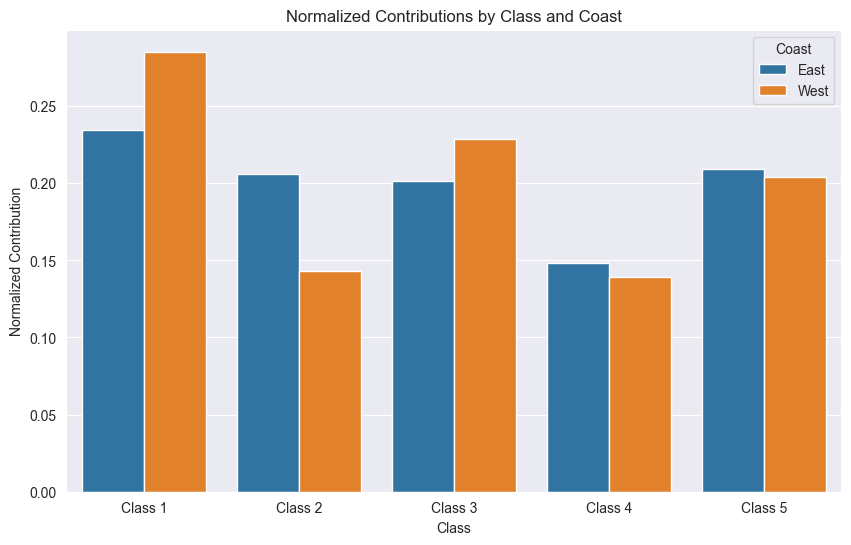

In [19]:
data = {
    'Class': ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'] * 2,
    'Contribution': [east_contribution[i] for i in range(5)] + [west_contribution[i] for i in range(5)],
    'Coast': ['East'] * 5 + ['West'] * 5
}

df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Contribution', hue='Coast', data=df)
plt.title('Normalized Contributions by Class and Coast')
plt.ylabel('Normalized Contribution')
plt.xlabel('Class')
plt.legend(title='Coast')

plt.show()

In [23]:
df

,Class,Contribution,Coast
0,Class 1,0.234753,East
1,Class 2,0.205984,East
2,Class 3,0.201381,East
3,Class 4,0.148446,East
4,Class 5,0.209436,East
5,Class 1,0.285266,West
6,Class 2,0.143156,West
7,Class 3,0.228840,West
8,Class 4,0.138976,West
9,Class 5,0.203762,West
